In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import sys
import os
import pickle
%matplotlib widget

PROJECT_ROOT = os.path.abspath(os.path.join(os.path.abspath('../..'),os.pardir))
sys.path.append(PROJECT_ROOT)

from electronTransportCode.SimulationDomain import SimulationDomain
from electronTransportCode.Material import unitDensityMaterial
from electronTransportCode.SimOptions import KDTestSource
from electronTransportCode.ParticleModel import DiffusionTestParticlev2
from electronTransportCode.MCParticleTracer import AnalogParticleTracer, KDParticleTracer
from electronTransportCode.MCEstimator import TrackEndEstimator


In [2]:
SIM = False  # True if you want to run the simulation here. False if you want to load in that data from data/

In [3]:
if SIM:
    # Set up simulation domain
    xmax = 15
    ymin = -xmax; ymax = xmax; ybins = 1  # No internal grid cell crossings
    zmin = -xmax; zmax = xmax; zbins = 1
    simDomain = SimulationDomain(ymin, ymax, zmin, zmax, ybins, zbins, material=unitDensityMaterial)

    # Set up initial conditions
    NB_PARTICLES = 20000
    eSource: float = 1.0  # dummy
    SEED: int = 4  # Random number generator seed
    pointSourceSim = KDTestSource(minEnergy=0.0, rngSeed=SEED, eSource=eSource)

    scatteringRate1 = '0.1*(1 + 0.5*sin(x))'; scatteringRate2 = '(1 + 0.5*sin(x))'; scatteringRate3 = '10*(1 + 0.5*sin(x))'

    sp = '(1 + 0.5*sin(x))'
    particle1 = DiffusionTestParticlev2(Es=scatteringRate1, sp=sp)
    particle2 = DiffusionTestParticlev2(Es=scatteringRate2, sp=sp)
    particle3 = DiffusionTestParticlev2(Es=scatteringRate3, sp=sp)

    particleTracerK = AnalogParticleTracer(particle=None, simOptions=pointSourceSim, simDomain=simDomain)
    particleTracerKD = KDParticleTracer(particle=None, simOptions=pointSourceSim, simDomain=simDomain, dS = eSource)  # stepsize is final time!

    TrackEndEstimatorK1 = TrackEndEstimator(simDomain, nb_particles=NB_PARTICLES, setting='x')
    TrackEndEstimatorK2 = TrackEndEstimator(simDomain, nb_particles=NB_PARTICLES, setting='x')
    TrackEndEstimatorK3 = TrackEndEstimator(simDomain, nb_particles=NB_PARTICLES, setting='x')

    TrackEndEstimatorKD1 = TrackEndEstimator(simDomain, nb_particles=NB_PARTICLES, setting='x')
    TrackEndEstimatorKD2 = TrackEndEstimator(simDomain, nb_particles=NB_PARTICLES, setting='x')
    TrackEndEstimatorKD3 = TrackEndEstimator(simDomain, nb_particles=NB_PARTICLES, setting='x')

In [4]:
if SIM:
    # Run KD particle tracer
    particleTracerKD(nbParticles=NB_PARTICLES, estimators=(TrackEndEstimatorKD1, ), logAmount=3000, particle=particle1)
    particleTracerKD(nbParticles=NB_PARTICLES, estimators=(TrackEndEstimatorKD2, ), logAmount=3000, particle=particle2)
    particleTracerKD(nbParticles=NB_PARTICLES, estimators=(TrackEndEstimatorKD3, ), logAmount=3000, particle=particle3)

    # Run analog particle tracer
    particleTracerK(nbParticles=NB_PARTICLES, estimators=(TrackEndEstimatorK1, ), logAmount=3000, particle=particle1)
    particleTracerK(nbParticles=NB_PARTICLES, estimators=(TrackEndEstimatorK2, ), logAmount=3000, particle=particle2)
    particleTracerK(nbParticles=NB_PARTICLES, estimators=(TrackEndEstimatorK3, ), logAmount=3000, particle=particle3)

else:
    # Load all simulation results from data/
    TrackEndEstimatorK1 = pickle.load(open('data/TrackEndEstimatorK1.pkl', 'rb'))[0]
    TrackEndEstimatorK2 = pickle.load(open('data/TrackEndEstimatorK2.pkl', 'rb'))[0]
    TrackEndEstimatorK3 = pickle.load(open('data/TrackEndEstimatorK3.pkl', 'rb'))[0]
    TrackEndEstimatorKD1 = pickle.load(open('data/TrackEndEstimatorKD1.pkl', 'rb'))[0]
    TrackEndEstimatorKD2 = pickle.load(open('data/TrackEndEstimatorKD2.pkl', 'rb'))[0]
    TrackEndEstimatorKD3 = pickle.load(open('data/TrackEndEstimatorKD3.pkl', 'rb'))[0]

    particleTracerK = pickle.load(open('data/particleTracerK.pkl', 'rb'))
    particleTracerKD = pickle.load(open('data/particleTracerKD.pkl', 'rb'))
    eSource, NB_PARTICLES = pickle.load(open('data/simargv.pkl', 'rb'))
print(eSource, NB_PARTICLES)

5.0 500000


Text(0.5, 1.0, '$\\Sigma_s(x) = 10*(1 + 0.5*sin(x))$')

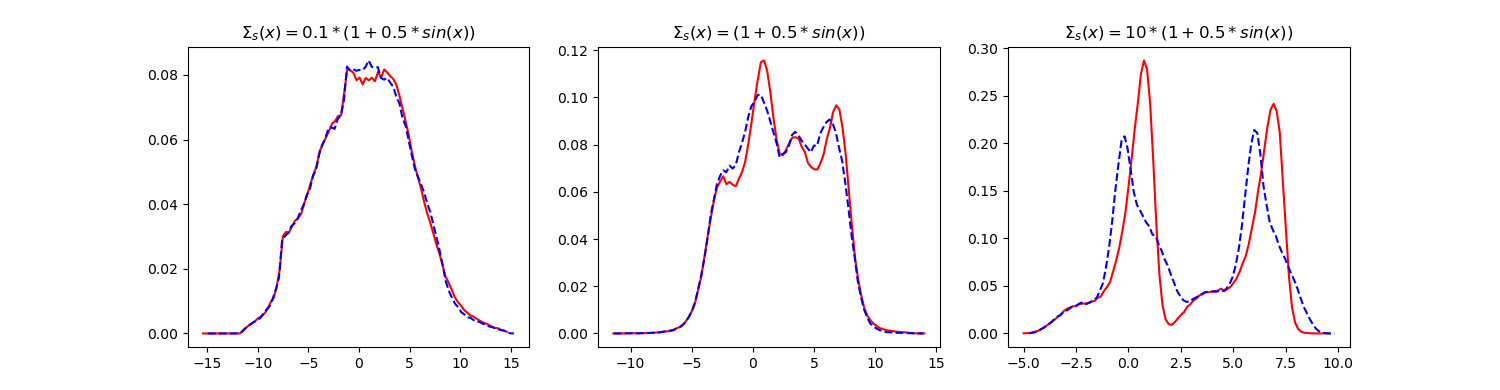

In [5]:
# Plotting
k1Center, k1Data = TrackEndEstimatorK1.getDensityData()
k2Center, k2Data = TrackEndEstimatorK2.getDensityData()
k3Center, k3Data = TrackEndEstimatorK3.getDensityData()
kd1Center, kd1Data = TrackEndEstimatorKD1.getDensityData()
kd2Center, kd2Data = TrackEndEstimatorKD2.getDensityData()
kd3Center, kd3Data = TrackEndEstimatorKD3.getDensityData()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3.9))

scatteringRate1 = '0.1*(1 + 0.5*sin(x))'; scatteringRate2 = '(1 + 0.5*sin(x))'; scatteringRate3 = '10*(1 + 0.5*sin(x))'

ax1.plot(k1Center, k1Data, 'r')
ax1.plot(kd1Center, kd1Data, '--b')
ax1.set_title(f'$\Sigma_s(x) = {scatteringRate1}$')

ax2.plot(k2Center, k2Data, 'r')
ax2.plot(kd2Center, kd2Data, '--b')
ax2.set_title(f'$\Sigma_s(x) = {scatteringRate2}$')

ax3.plot(k3Center, k3Data, 'r')
ax3.plot(kd3Center, kd3Data, '--b')
ax3.set_title(f'$\Sigma_s(x) = {scatteringRate3}$')

# Try different stepsize. Large step size might be messing with the integral approximation
# Try pointsource test and use wasserstein distance to quantify error

### Sampeling strategy 1

In [6]:

theta, phi = sy.symbols('theta phi')  # type: ignore

xcoor = sy.sin(theta)*sy.cos(phi)  # type: ignore
ycoor = sy.sin(theta)*sy.sin(phi)  # type: ignore
zcoor = sy.cos(theta)

xmean = sy.integrate(xcoor*sy.sin(theta)/(2*sy.pi), (theta, 0, sy.pi), (phi, -sy.pi/2, sy.pi/2))  # type: ignore
ymean = sy.integrate(ycoor*sy.sin(theta)/(2*sy.pi), (theta, 0, sy.pi), (phi, -sy.pi/2, sy.pi/2))  # type: ignore
zmean = sy.integrate(zcoor*sy.sin(theta)/(2*sy.pi), (theta, 0, sy.pi), (phi, -sy.pi/2, sy.pi/2))  # type: ignore

xvar = sy.integrate(((xcoor - xmean)**2)*sy.sin(theta)/(2*sy.pi), (theta, 0, sy.pi), (phi, -sy.pi/2, sy.pi/2))  # type: ignore
yvar = sy.integrate(((ycoor - ymean)**2)*sy.sin(theta)/(2*sy.pi), (theta, 0, sy.pi), (phi, -sy.pi/2, sy.pi/2))  # type: ignore
zvar = sy.integrate(((zcoor - zmean)**2)*sy.sin(theta)/(2*sy.pi), (theta, 0, sy.pi), (phi, -sy.pi/2, sy.pi/2))  # type: ignore

print(f'X: mean: {xmean}   var: {xvar}')
print(f'Y: mean: {ymean}   var: {yvar}')
print(f'Z: mean: {zmean}   var: {zvar}')

X: mean: 1/2   var: 1/12
Y: mean: 0   var: 1/3
Z: mean: 0   var: 1/3


In [7]:
# Sampeling strategy: Isotropic distribution in the x > 0 part of 3D space. 
N = 100000

res = np.zeros((3, N))

for index, sample in enumerate(range(N)):
        # cos(theta)
        cost = np.random.uniform(low=-1, high=1)
        sint = np.sqrt(1 - cost**2)  # scatter left or right with equal probability

        # azimuthal scattering angle
        phiAngle = np.random.uniform(low=-np.pi/2, high=np.pi/2)
        cosphi = np.cos(phiAngle)
        sinphi = np.sin(phiAngle)
        res[:, index] = np.array((sint*cosphi, sint*sinphi, cost), dtype=float)
        
print(f'X: mean: {np.mean(res[0, :])} Variance: {np.var(res[0, :])}')
print(f'Y: mean: {np.mean(res[1, :])} Variance: {np.var(res[1, :])}')
print(f'Z: mean: {np.mean(res[2, :])} Variance: {np.var(res[2, :])}')

X: mean: 0.5011540476579099 Variance: 0.08310215090558964
Y: mean: 0.0019550203701691974 Variance: 0.3332364000804403
Z: mean: 8.461584003338334e-05 Variance: 0.3325022402655752


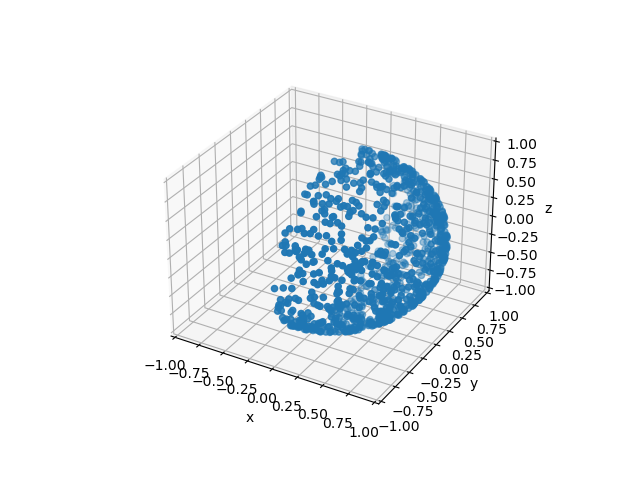

In [8]:
# 3D plot
if N > 1000:
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.scatter(res[0, 0:1000], res[1, 0:1000], res[2, 0:1000])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])